In [1]:
# https://www.kaggle.com/nilaydesmukh/restaurant-food-consumption ---source data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("DATA2.csv")

In [4]:
df.head(5)

,Date_time,Shift,Day Type,Day,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
0,2019-01-01 11:30:00,Lunch,Weekday,2,4,Starter,Gobi manchurian,14.0,1
1,2019-01-01 11:30:00,Lunch,Weekday,2,4,Starter,Tasty flatbread,11.0,1
2,2019-01-01 11:30:00,Lunch,Weekday,2,4,Vegetable specials,Sarson da saag,15.0,1
3,2019-01-01 11:30:00,Lunch,Weekday,2,4,Vegetable specials,Paneer vindaloo,16.0,1
4,2019-01-01 11:30:00,Lunch,Weekday,2,4,Breads,Garlic naan,3.5,2


In [5]:
df.describe()

,Day,PartySize,ItemPrice,ItemQty
count,18100.000000,18100.000000,18100.000000,18100.000000
mean,4.016575,3.136354,10.587500,1.430000
std,1.993068,1.812888,5.924729,0.604252
min,1.000000,0.000000,2.750000,1.000000
25%,2.000000,2.000000,5.000000,1.000000
50%,4.000000,3.000000,11.000000,1.000000
75%,6.000000,5.000000,16.000000,2.000000
max,7.000000,5.000000,19.000000,4.000000


In [6]:
len(pd.unique(df['PartySize']))

#finding the no of unique elements in the party size column to get a idea about algorithm to be applied

5

In [7]:
len(pd.unique(df['MenuItem']))

43

In [8]:
len(pd.unique(df['ItemQty']))# since it is feasible and also logical to classify as item_qty , we will use item_qty as target   

4

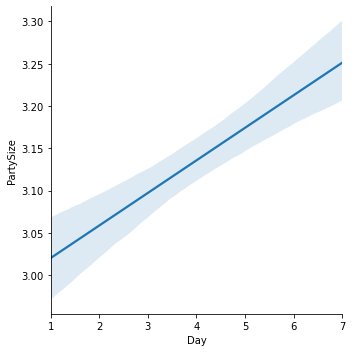

In [9]:
sns.lmplot(x='Day',y='PartySize',data=df,scatter=False) #this shows that average party size increases around 
#the weekwnds i.e day7=sunday

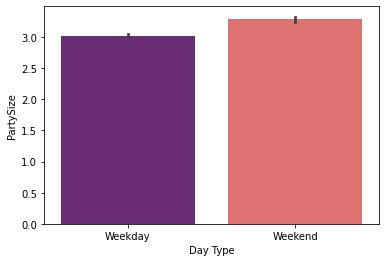

In [10]:
sns.barplot(x='Day Type',y='PartySize',data=df,palette="magma") 
#this again verifies the assumption made using above plot that customers increase around weekend  

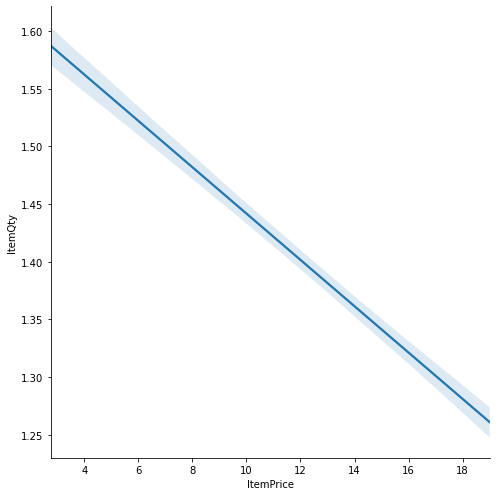

In [11]:
sns.lmplot(x='ItemPrice',y='ItemQty',data=df,scatter=False,aspect=1,height=7)
#this data shows that on an average quantity of an item purchased is inversely proportional to its price.

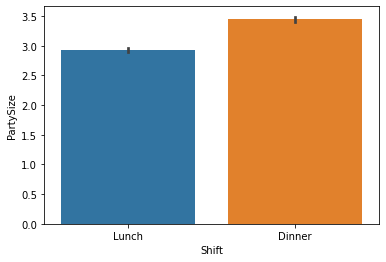

In [12]:
sns.barplot(x='Shift',y='PartySize',data=df)
#here we can see that more number of customers tend to come at dinner time than at lunch.

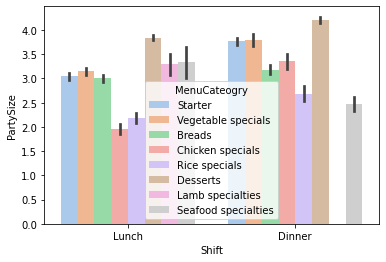

In [13]:
sns.barplot(x='Shift',y='PartySize',data=df,hue="MenuCateogry",palette="pastel") 
#Here we see that the consumption for each individual menu category dishes tend to increase at dinner time.
#Exceptions being seafood consumption which tends to decrease at night time and lamb specialities which i guess 
#aren't prepared at all during dinner.

In [14]:
grouped_df=df.groupby("MenuItem").mean()
grouped_df=grouped_df.reset_index()
grouped_df.sort_values("PartySize",axis=0,ascending=False,inplace=True)
(grouped_df)
#This is a visualization to estimate what are the famous menu items in the list.
#The menu items have been arranged in descending order of average party size.

,MenuItem,Day,PartySize,ItemPrice,ItemQty
35,Spinach naan,4.016575,5.000000,6.00,1.000000
4,Carrot halwa,4.016575,4.666667,7.00,1.000000
41,Vegetable samosa,4.016575,4.569061,11.00,1.000000
38,Tasty sliders : chicken paneer,4.016575,4.569061,15.00,1.000000
34,Spicy chicken bites,4.016575,4.569061,14.00,1.000000
16,Gobi manchurian,4.016575,4.500000,14.00,1.500000
28,Paneer vindaloo,4.016575,4.500000,16.00,1.000000
21,Kheer,4.016575,4.430939,7.00,1.500000
5,Chaat papri,4.016575,4.138122,11.00,2.000000
39,Tikka rice bowl : paneer | chicken,4.016575,4.138122,18.00,2.000000


In [15]:
grouped_df2=df.groupby("MenuCateogry").mean()
grouped_df2=grouped_df2.reset_index()
grouped_df2.sort_values("PartySize",axis=0,ascending=False,inplace=True)
(grouped_df2)
#Visualization to estimate the popularity of Menu Category using average party size as the estimator.
#Notice how Desserts tend to outpass evry other MENU CATEGORY. Maybe dessert is a speciality of this restaurant. 

,MenuCateogry,Day,PartySize,ItemPrice,ItemQty
2,Desserts,4.016575,3.990792,6.733333,1.200000
6,Starter,4.016575,3.386415,13.000000,1.411765
7,Vegetable specials,4.016575,3.346093,15.785714,1.214286
3,Lamb specialties,4.016575,3.292818,19.000000,1.000000
0,Breads,4.016575,3.081031,3.731481,1.777778
5,Seafood specialties,4.016575,2.754144,19.000000,1.500000
4,Rice specials,4.016575,2.381215,9.555556,1.333333
1,Chicken specials,4.016575,2.340841,18.000000,1.307692


In [16]:
df.drop("Date_time",inplace=True,axis=1) 

In [17]:
df.drop("Day Type",inplace=True,axis=1)

In [18]:
df.head()#after dropping the date_time and day_type column 

,Shift,Day,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
0,Lunch,2,4,Starter,Gobi manchurian,14.0,1
1,Lunch,2,4,Starter,Tasty flatbread,11.0,1
2,Lunch,2,4,Vegetable specials,Sarson da saag,15.0,1
3,Lunch,2,4,Vegetable specials,Paneer vindaloo,16.0,1
4,Lunch,2,4,Breads,Garlic naan,3.5,2


In [19]:
#first we need to perform one_hot_encoding on the categorical columns to pass them into classifier algorithms.


In [36]:
final_data = pd.get_dummies(df,columns=["MenuCateogry","MenuItem","Shift"],drop_first=True)

In [37]:
final_data.head()

,Day,PartySize,ItemPrice,ItemQty,MenuCateogry_Chicken specials,MenuCateogry_Desserts,MenuCateogry_Lamb specialties,MenuCateogry_Rice specials,MenuCateogry_Seafood specialties,MenuCateogry_Starter,...,MenuItem_Spicy chicken bites,MenuItem_Spinach naan,MenuItem_Tandoori roti,MenuItem_Tasty flatbread,MenuItem_Tasty sliders : chicken paneer,MenuItem_Tikka rice bowl : paneer | chicken,MenuItem_Vegetable pakora,MenuItem_Vegetable samosa,MenuItem_Yellow dal fry,Shift_Lunch
0,2,4,14.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,2,4,11.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,2,4,15.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,2,4,16.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,4,3.5,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = final_data.drop('ItemQty',axis=1)
y = final_data['ItemQty']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=150)
# Targrt coloumn is "Item Quantity" . We are trying to predict the quantity that can be ordered for a menu item based on
# several factors like day of the week, popularity of the cuisine and PartySize.

In [24]:
from sklearn.ensemble import RandomForestClassifier
# We first decided to go through the random forest classifier algorithm as it performs well in categorical data and
# multi-class classification problems.

In [25]:
rfc = RandomForestClassifier(n_estimators=600)

In [26]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [27]:
predictions = rfc.predict(X_test)

In [28]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.97      0.95      0.96      3702
           2       0.91      0.93      0.92      2038
           3       0.86      1.00      0.92       178
           4       1.00      1.00      1.00        55

    accuracy                           0.95      5973
   macro avg       0.94      0.97      0.95      5973
weighted avg       0.95      0.95      0.95      5973



In [30]:
print(confusion_matrix(y_test,predictions))
#confusion matrix is 4X4 because we are categorizing data into 4 target classes as present in training set.

[[3522  180    0    0]
 [ 116 1893   29    0]
 [   0    0  178    0]
 [   0    0    0   55]]


In [31]:
import pickle

In [32]:
pickle.dump(rfc,open('model.pkl','wb'))

In [ ]:

# THANKS !